### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
male_data=pd.read_csv('male_complete.csv')

In [3]:
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [4]:
male_swim = male_data[male_data['Sport'] == 'Football']

In [5]:
male_swim['Sport'].describe

<bound method NDFrame.describe of 6055    Football
6056    Football
6057    Football
6058    Football
6059    Football
          ...   
7387    Football
7388    Football
7389    Football
7390    Football
7391    Football
Name: Sport, Length: 1337, dtype: object>

In [6]:
male_swim['Medal'].describe

<bound method NDFrame.describe of 6055    Gold
6056      NA
6057      NA
6058      NA
6059      NA
        ... 
7387      NA
7388      NA
7389      NA
7390      NA
7391      NA
Name: Medal, Length: 1337, dtype: object>

In [7]:
male_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 6055 to 7391
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1337 non-null   int64  
 1   Unnamed: 0_x    1337 non-null   int64  
 2   ID              1337 non-null   int64  
 3   Name            1337 non-null   object 
 4   Sex             1337 non-null   object 
 5   Age             1337 non-null   float64
 6   Height          1337 non-null   float64
 7   Weight          1337 non-null   float64
 8   NOC             1337 non-null   object 
 9   Games           1337 non-null   object 
 10  Year            1337 non-null   int64  
 11  Season          1337 non-null   object 
 12  City            1337 non-null   object 
 13  Sport           1337 non-null   object 
 14  Event           1337 non-null   object 
 15  Medal           1337 non-null   object 
 16  Team            1337 non-null   object 
 17  Unnamed: 0_y    1337 non-null 

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(male_swim["Medal"]).astype('category')
X = pd.DataFrame(male_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1002, 1) (1002, 6)
Test Set  : (335, 1) (335, 6)


In [10]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [11]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
6628,20.0,78.0,182.0,4.925953e+10,7350222.0,6701.773913,NA
6637,22.0,77.0,180.0,5.040000e+12,128063000.0,39355.629651,NA
6623,23.0,81.0,181.0,1.890000e+11,10483861.0,18027.709448,NA
6639,23.0,72.0,175.0,2.422490e+10,19610000.0,1235.334171,NA
6376,21.0,72.0,178.0,1.800000e+12,57685327.0,31203.775615,Bronze
...,...,...,...,...,...,...,...
6498,23.0,75.0,187.0,1.220000e+12,50200000.0,24302.788845,Bronze
7064,21.0,54.0,165.0,7.700000e+11,106995583.0,7196.558759,NA
6806,23.0,78.0,177.0,8.033877e+09,5703740.0,1408.527976,Silver
6313,22.0,78.0,195.0,2.911488e+10,5389000.0,5402.649030,NA


In [12]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        1080
Bronze      87
Gold        85
Silver      85
Name: Medal, dtype: int64


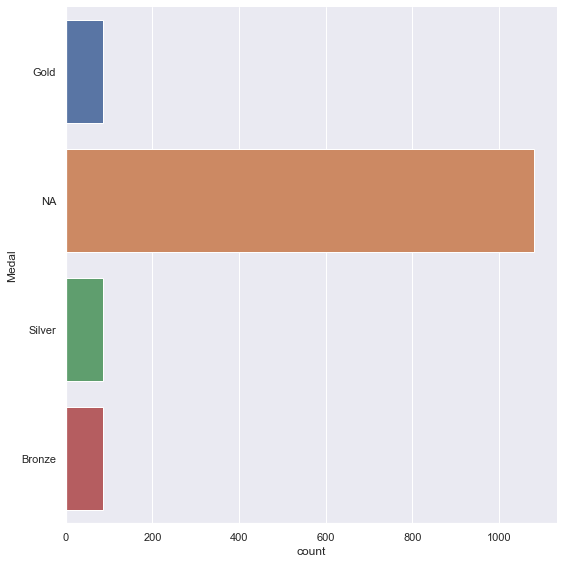

In [13]:
# Medal Types in the Dataset
print("Number of Medal Types :", len(male_swim["Medal"].unique()))

print(male_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = male_swim, kind = "count", height = 8)

In [14]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(1002, 6) (1002, 1)


In [15]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(3204, 6) (3204, 1)


In [16]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,20.000000,78.000000,182.000000,4.925953e+10,7350222.0,6701.773913,NA
1,22.000000,77.000000,180.000000,5.040000e+12,128063000.0,39355.629651,NA
2,23.000000,81.000000,181.000000,1.890000e+11,10483861.0,18027.709448,NA
3,23.000000,72.000000,175.000000,2.422490e+10,19610000.0,1235.334171,NA
4,21.000000,72.000000,178.000000,1.800000e+12,57685327.0,31203.775615,Bronze
...,...,...,...,...,...,...,...
3199,21.000000,78.823025,184.057564,3.480000e+12,82667685.0,42096.255629,Silver
3200,22.880930,82.047441,185.000000,8.033877e+09,5703740.0,1408.527976,Silver
3201,25.238812,72.352238,180.295525,2.080000e+11,150347390.0,1383.462659,Silver
3202,22.377799,75.000000,186.377799,5.950000e+11,40567864.0,14666.781569,Silver


In [17]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
6208,22.0,62.0,168.0,1.590000e+11,40606052.0,3915.672472
6602,21.0,79.0,183.0,7.103529e+09,6524283.0,1088.783165
7362,23.0,72.0,177.0,4.890000e+12,126843000.0,38551.595279
6412,22.0,81.0,185.0,1.330000e+11,4259800.0,31222.123104
7182,21.0,73.0,178.0,1.000000e+12,49050000.0,20387.359837
...,...,...,...,...,...,...
6124,20.0,90.0,192.0,1.890000e+11,10483861.0,18027.709448
6615,21.0,75.0,186.0,1.220000e+12,50200000.0,24302.788845
7091,19.0,85.0,191.0,4.925953e+10,7350222.0,6701.773913
6624,23.0,83.0,180.0,2.486148e+10,7463157.0,3331.228766


Number of Medal Types : 4
Bronze    801
Gold      801
NA        801
Silver    801
Name: Medal, dtype: int64


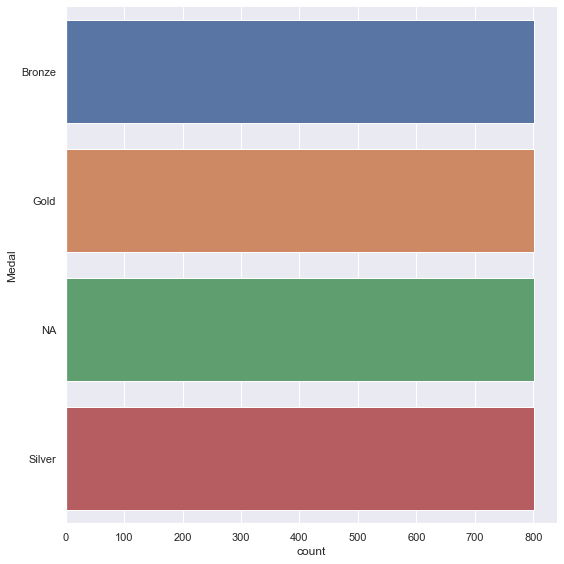

In [18]:
# Medal Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (2403, 1) (2403, 6)
Test Set  : (801, 1) (801, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9750312109862672

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9637952559300874



<AxesSubplot:>

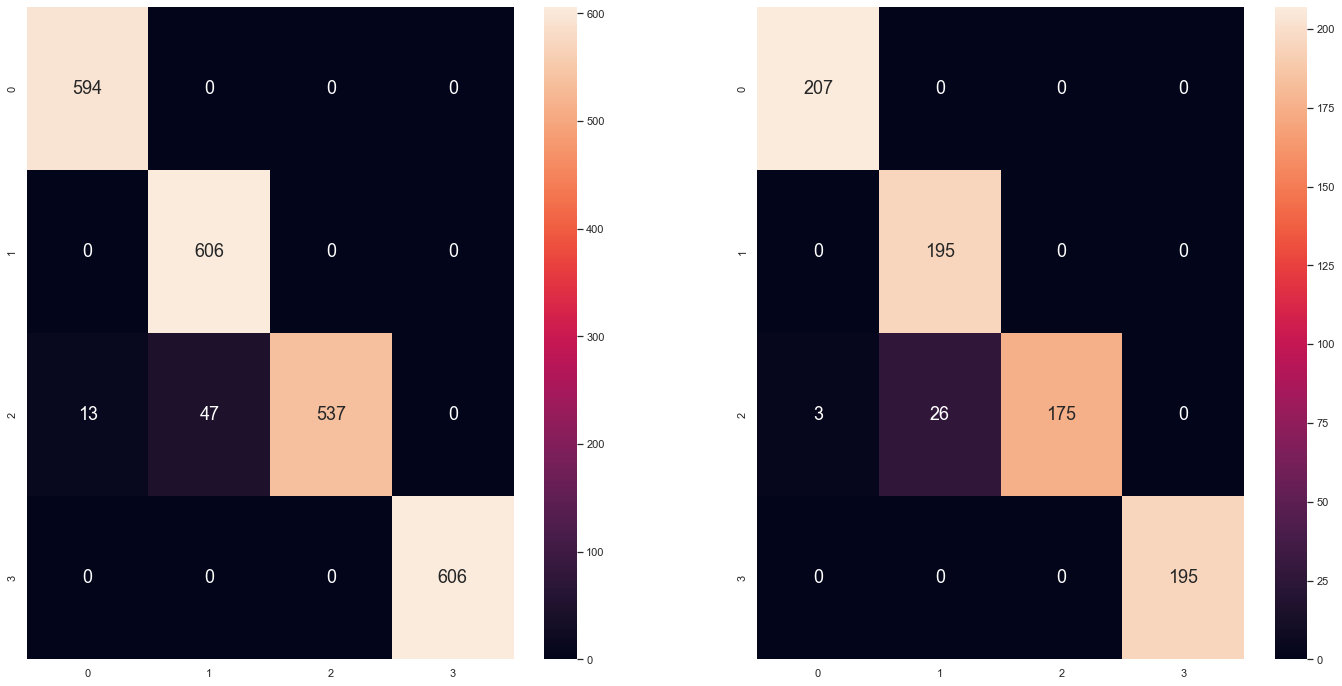

In [19]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 6)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

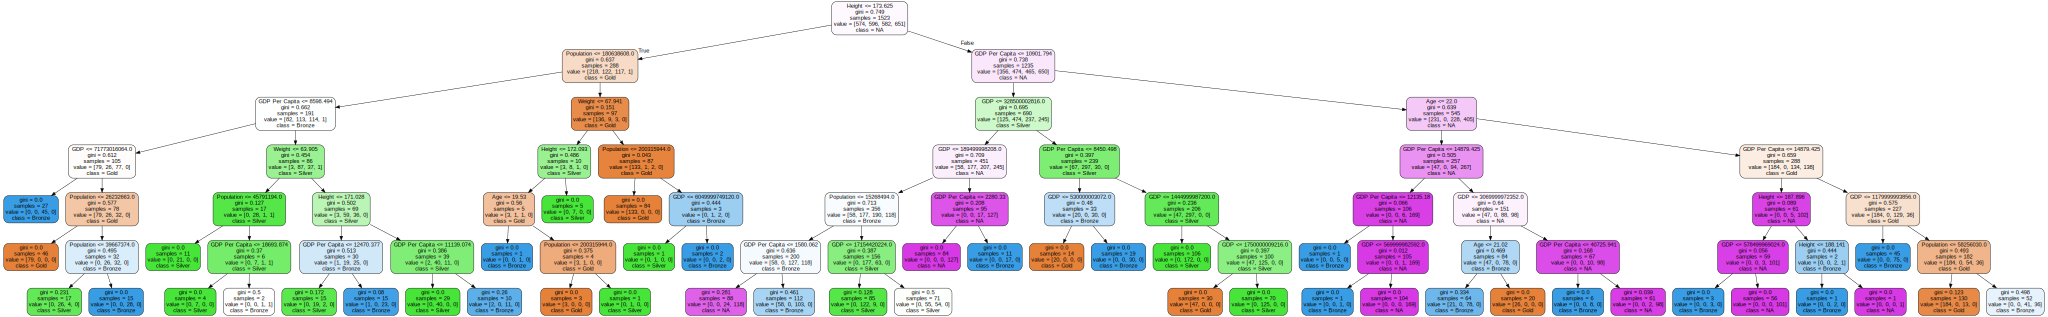

In [20]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [21]:
graph.render("Tree_male_FOOTBALL")

'Tree_male_FOOTBALL.pdf'

### Predictions

In [22]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.8746268656716418


<AxesSubplot:>

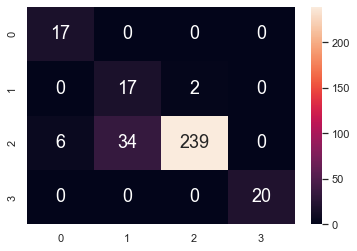

In [23]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})